In [ ]:
#CART algo -  Classification and Regression Tree algorithm.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("heart.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


**age**: the age of the patient in years.

**sex**: the sex of the patient (1 = male, 0 = female).

**cp**: the type of chest pain the patient experienced (1 = typical angina, 2 = atypical angina, 3 = non-anginal pain, 4 = asymptomatic).

**trestbps**: the resting blood pressure of the patient in mm Hg.

**chol**: the serum cholesterol level of the patient in mg/dl.

**fbs**: the fasting blood sugar level of the patient, measured in mg/dl (1 = high, 0 = low).

**restecg**: the resting electrocardiographic results of the patient (0 = normal, 1 = ST-T wave abnormality, 2 = left ventricular hypertrophy).

(Resting electrocardiographic (ECG or EKG) is a non-invasive diagnostic test that records the electrical activity of the heart while the patient is at rest. The test is performed using an electrocardiogram machine, which records the electrical signals produced by the heart through electrodes placed on the chest, arms, and legs.)

**thalach**: the maximum heart rate achieved by the patient during exercise.
exang: whether the patient experienced exercise-induced angina (1 = yes, 0 = no).

**oldpeak**: the ST depression induced by exercise relative to rest.
slope: the slope of the ST segment during peak exercise (1 = upsloping, 2 = flat, 3 = downsloping).

(ST depression induced by exercise relative to rest
Oldpeak, also known as ST depression, is a common parameter measured during an exercise stress test to evaluate the presence and severity of coronary artery disease. It represents the amount of ST segment depression that occurs on an electrocardiogram (ECG) during exercise compared to rest.)

**ca**: the number of major vessels colored by fluoroscopy (0-3).

(he number of major vessels (0-3) colored by fluoroscopy is a parameter that is used to assess the severity of coronary artery disease (CAD) in patients who undergo coronary angiography)

**thal**: the type of thallium scan performed on the patient (1 = fixed defect, 2 = reversible defect, 3 = normal).

target: the presence of heart disease in the patient (0 = no disease, 1 = disease present).


In [3]:
#EDA

In [5]:
#Null values
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
#Handling null values
#1) df.dropna()
#2) df['slope'].fillna(df['slope'].mean())

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
df.shape

(303, 14)

In [8]:
#duplicate rows
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
298    False
299    False
300    False
301    False
302    False
Length: 303, dtype: bool

In [9]:
df[df.duplicated()]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [11]:
df.duplicated().sum()

1

In [12]:
df.drop_duplicates(inplace=True)

In [13]:
df.duplicated().sum()

0

In [14]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [15]:
col = list(df.columns)
col

['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal',
 'target']

In [16]:
type(col)

list

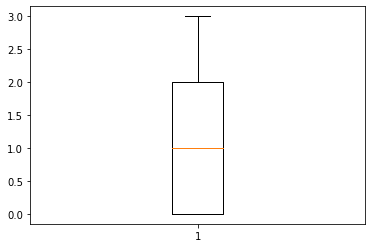

In [17]:
#Outliers detection #Boxplot
plt.boxplot(df['cp']);

In [18]:
col

['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal',
 'target']

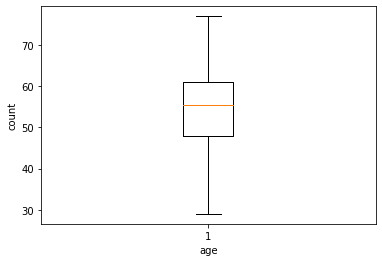

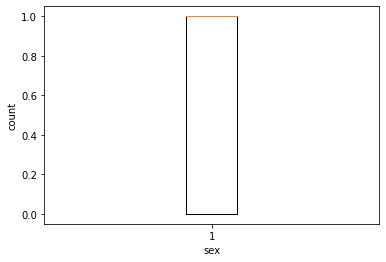

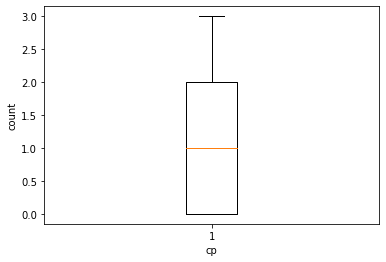

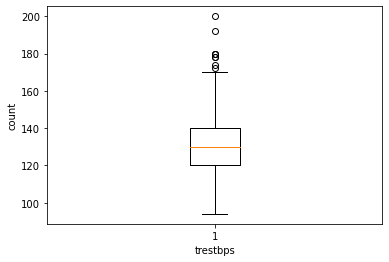

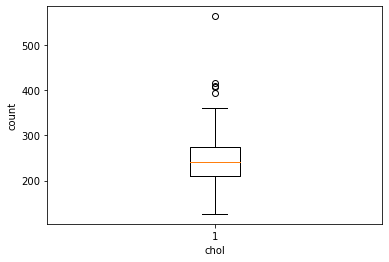

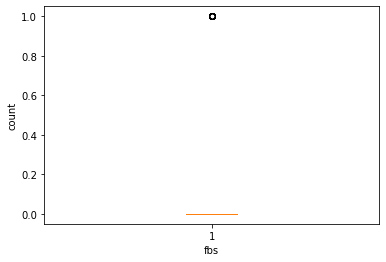

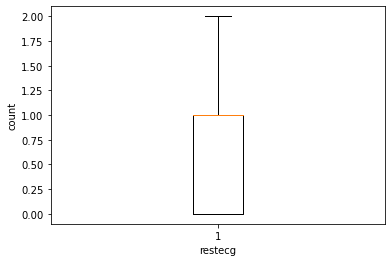

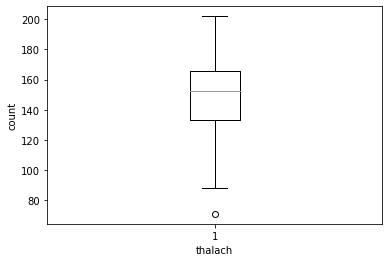

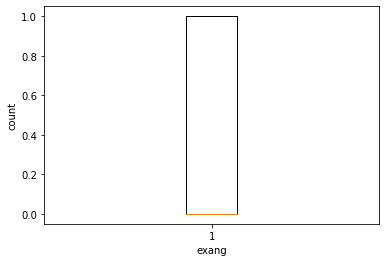

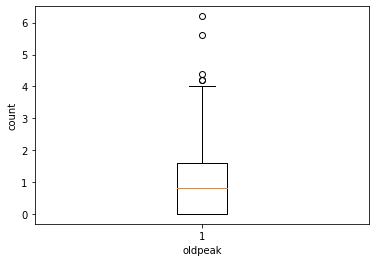

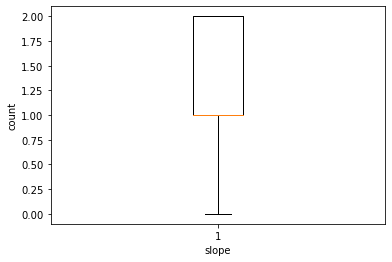

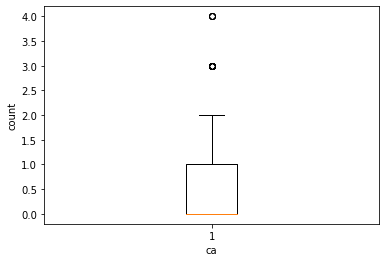

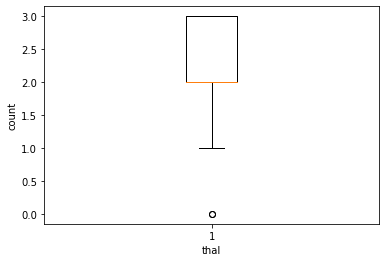

In [19]:
for col_name in col:
    
    if ((df[col_name].dtype != object) & (col_name != "target")):
        
        plt.boxplot(df[col_name])
        plt.xlabel(col_name)
        plt.ylabel("count")
        plt.show()

In [20]:
out_col = ["trestbps","chol","thalach","oldpeak"]

In [21]:
#chol - outlier removal

#Q1 = df['chol'].quantile(0.25)
#Q3 = df['chol'].quantile(0.75)
#IQR = Q3-Q1

#lower = Q1-1.5*IQR
#upper = Q3+1.5*IQR

#df = df[(df['chol']<=upper) & (df['chol']>=lower)]

In [22]:
#removing outliers

for i in out_col:
    
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3-Q1

    lower = Q1-1.5*IQR
    upper = Q3+1.5*IQR

    df = df[(df[i]<=upper) & (df[i]>= lower)]

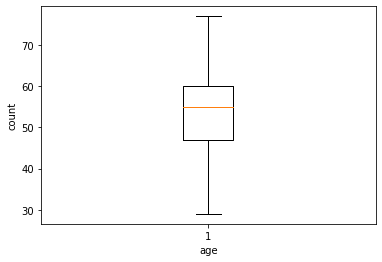

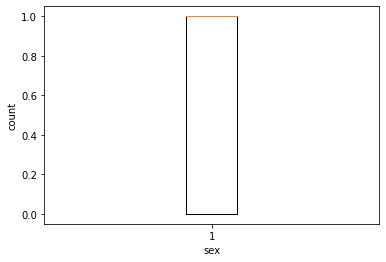

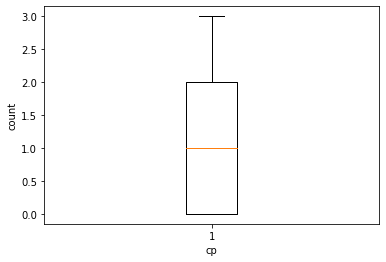

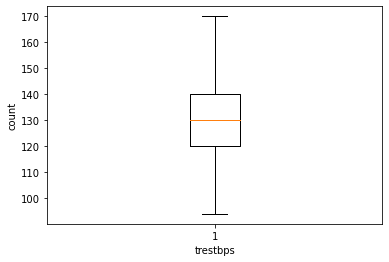

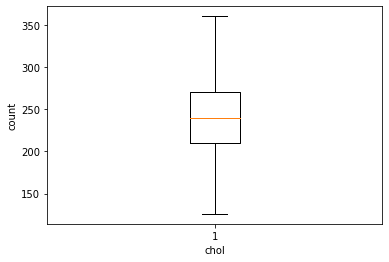

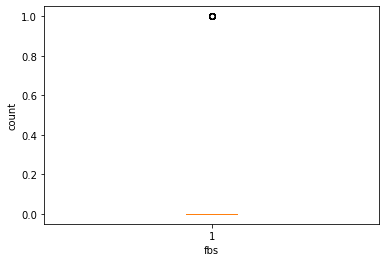

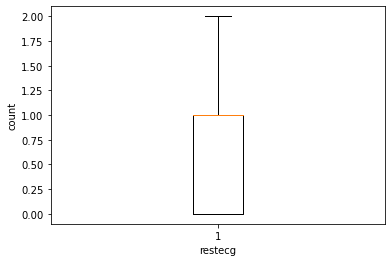

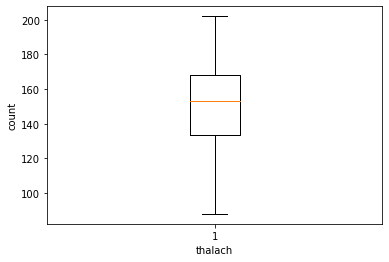

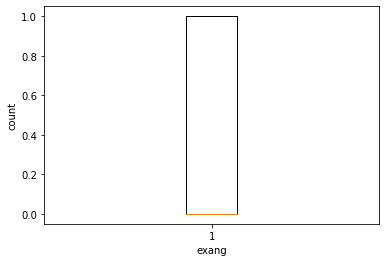

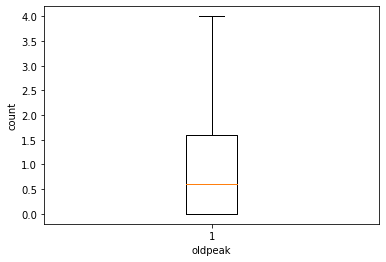

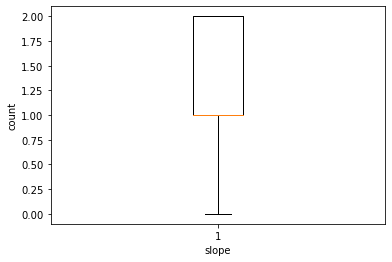

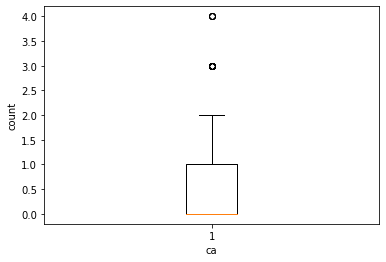

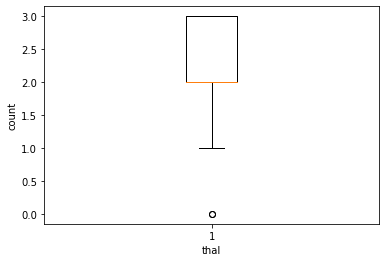

In [23]:
#plotting the boxplot

for col_name in col:
    
    if ((df[col_name].dtype != object) & (col_name != "target")):
        
        plt.boxplot(df[col_name])
        plt.xlabel(col_name)
        plt.ylabel("count")
        plt.show()

In [24]:
df.shape #303

(283, 14)

In [25]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [26]:
#Model Building

In [27]:
# spliting the data into dependent and independent
x = df.iloc[:,:-1]
y = df["target"]

In [28]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [29]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 283, dtype: int64

In [30]:
# spliting the data into training and testing
from sklearn.model_selection import train_test_split

In [31]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=999)

In [32]:
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
94,45,0,1,112,160,0,1,138,0,0.0,1,0,2
55,52,1,1,134,201,0,1,158,0,0.8,2,1,2
190,51,0,0,130,305,0,1,142,1,1.2,1,0,3
205,52,1,0,128,255,0,1,161,1,0.0,2,1,3
49,53,0,0,138,234,0,0,160,0,0.0,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,54,0,2,108,267,0,0,167,0,0.0,2,0,2
17,66,0,3,150,226,0,1,114,0,2.6,0,0,2
229,64,1,2,125,309,0,1,131,1,1.8,1,0,3
237,60,1,0,140,293,0,0,170,0,1.2,1,2,3


In [34]:
x_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
140,51,0,2,120,295,0,0,157,0,0.6,2,0,2
89,58,0,0,100,248,0,0,122,0,1.0,1,0,2
88,54,0,2,110,214,0,1,158,0,1.6,1,0,2
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,48,1,0,122,222,0,0,186,0,0.0,2,0,2
255,45,1,0,142,309,0,0,147,1,0.0,1,3,3
18,43,1,0,150,247,0,1,171,0,1.5,2,0,2
219,48,1,0,130,256,1,0,150,1,0.0,2,2,3


In [35]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion='entropy', max_depth=4) #fit, predict

#min_samples_split -> 2
#min_samples_leaf -> 1

In [36]:
dt = dt.fit(x_train, y_train) #training

In [37]:
x_test.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
140,51,0,2,120,295,0,0,157,0,0.6,2,0,2
89,58,0,0,100,248,0,0,122,0,1.0,1,0,2
88,54,0,2,110,214,0,1,158,0,1.6,1,0,2
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2


In [38]:
y_pred = dt.predict(x_test)

In [39]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0],
      dtype=int64)

In [40]:
y_test.head()

140    1
89     1
88     1
9      1
196    0
Name: target, dtype: int64

In [41]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [42]:
accuracy_score(y_pred, y_test)

0.788235294117647

In [43]:
confusion_matrix(y_pred, y_test)

array([[22,  6],
       [12, 45]], dtype=int64)

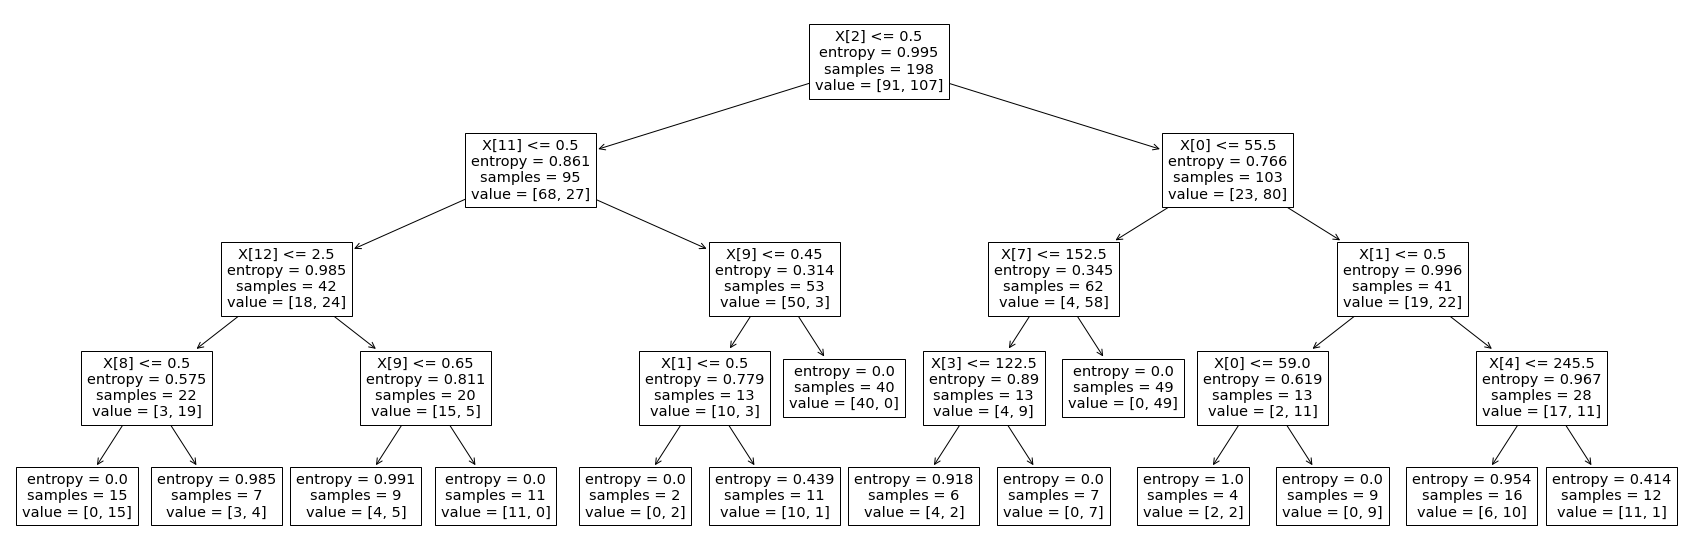

<Figure size 432x288 with 0 Axes>

In [47]:
#plotting the decision tree

from sklearn import tree

plt.figure(figsize=(30, 10))
tree.plot_tree(dt)
plt.show()

plt.savefig('decision_tree.jpg')

#Hyperparameter tuning refers to the process of selecting the optimal values for the hyperparameters of a machine learning model. 

#Cross validation

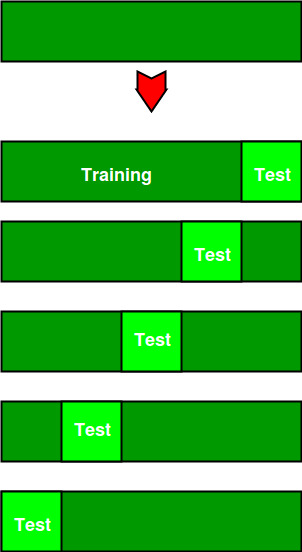

In [60]:
#Hyperparamter tuining using GridSearchCV

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [61]:
# Define the hyperparameter grid

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

dt = DecisionTreeClassifier()

In [62]:
# Perform grid search with cross-validation
grid_search = GridSearchCV(dt, param_grid, cv=5)
grid_search.fit(x, y)  # X and y are your training data and labels

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]})

In [63]:
best_params = grid_search.best_params_
print(best_params)

{'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [64]:
best_dt = grid_search.best_estimator_
print(best_dt)

DecisionTreeClassifier(criterion='entropy', max_depth=5)


In [65]:
# Use the best model for predictions or further analysis
predictions = best_dt.predict(x_test) 

In [66]:
accuracy_score(predictions, y_test)

0.9294117647058824

In [67]:
x_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
140,51,0,2,120,295,0,0,157,0,0.6,2,0,2
89,58,0,0,100,248,0,0,122,0,1.0,1,0,2
88,54,0,2,110,214,0,1,158,0,1.6,1,0,2
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,48,1,0,122,222,0,0,186,0,0.0,2,0,2
255,45,1,0,142,309,0,0,147,1,0.0,1,3,3
18,43,1,0,150,247,0,1,171,0,1.5,2,0,2
219,48,1,0,130,256,1,0,150,1,0.0,2,2,3


In [68]:
#predicting new data
best_dt.predict([[63,1, 3, 356, 88, 1, 899, 0, 0, 10, 8, 89, 8 ]])

array([0], dtype=int64)